#### Кафедра дискретной математики МФТИ

#### Курс математической статистики

Игашов Илья, 593 групппа

#  Задание №5

## №2. 

Рассмотрим модель смеси гауссовских распределений $p(x) = \sum_{k=1}^{K}p_k(x)P(T = k)$, где $T$ — номер компоненты смеси, а $p_k(x)$ — плотность распределения $N(a_k, \Sigma_k)$. Загрузите данные из набора Ирисы Фишера. В этих данных представлена выборка из распределения случайного 4-мерного вектора $X$, являющегося смесью трех гауссовских векторов. Иными словами, выборка состоит из трех частей $(K = 3)$, каждой соответствует номер от 1 до 3 (номер компоненты смеси, в сооответствии с которым выборка представлена в смеси). Сама выборка находится в load_iris()["data"], а в load_iris()["target"] записаны номера компонент смеси. В предположении, что каждая из трех выборок имеет гауссовское распределение, оцените их параметры $(a_1, a_2, a_3, \Sigma_1, \Sigma_2, \Sigma_3)$. 

Параметры распределения $N(a, \Sigma)$ по выборке $X_1,\dots,X_n$ оцениваются следующим образом: $\hat{a} = \bar{X}$, оценка ковариация i-ой и j-ой компонент равна $\bar{X^iX^j} − \bar{X^i}·\bar{X^j}$.

Занумеруем координаты данных векторов числами $0, 1, 2, 3$. Для пар координат $(0, 1), (1, 3)$ и $(2, 3)$ вычислите плотность каждой компоненты смеси (три плотности для каждой пары координат), оценив параметры распределений по проекциям трех выборок (каждая выборка соответствует одной компоненте смеси) на соответствующие плоскости. Нарисуйте графики (рисовать нужно линии уровня) этих плотностей (3 × 3 = 9 штук), на которые нанесите также соответствующие проекции точек выборки.

Оцените вероятности $P(T = k)$ частотами вхождений k-ых компонент смеси в данную выборку. На основе полученных оценок вычислите условное математическое ожидание $E(X|T\neq k)$ для всех $k = 1, 2, 3$ (три числа). Для пар координат $(0, 1), (1, 3)$ и $(2, 3)$ получите новые оценки (распределения $T$) и постройте графики условной плотности $p_{(X|I\{T\neq k\})}(x|1)$ (9 штук).

Классифицируйте все пространство 4-мерных векторов по принципу $$k = argmax_{k}{p_{(X|I{T=k})}(x|1)}$$ (здесь условная плотность и оценка распределения $T$ считается на основе оценок для 4-мерных векторов). Посчитайте долю ошибок на выборке. Нарисуйте классификацию всего пространства в проекции на пары координат $(0, 1), (1, 3)$ и $(2, 3)$, где закрасьте разными цветами области, которые образовались в результате классификации.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from scipy.stats import multivariate_normal
from sklearn.datasets import load_iris

%matplotlib inline

In [2]:
dim = 4
setosa = load_iris().data[:50]
versicolor = load_iris().data[50:100]
virginica = load_iris().data[100:150]

In [3]:
# Count estimations.
a_setosa = np.array([np.mean(setosa[:,i]) for i in range(dim)])
a_versicolor = np.array([np.mean(versicolor[:, i]) for i in range(dim)])
a_virginica = np.array([np.mean(virginica[:, i]) for i in range(dim)])

sigma_setosa = np.array([[np.mean(setosa[:,i] * setosa[:,j]) - np.mean(setosa[:,i]) * np.mean(setosa[:,j]) 
                          for j in range(dim)] for i in range(dim)])
sigma_versicolor = np.array([[np.mean(versicolor[:,i] * versicolor[:,j]) 
                              - np.mean(versicolor[:,i]) * np.mean(versicolor[:,j]) for j in range(dim)] 
                             for i in range(dim)])
sigma_virginica = np.array([[np.mean(virginica[:,i] * virginica[:,j]) 
                         - np.mean(virginica[:,i]) * np.mean(virginica[:,j]) for j in range(dim)] 
                            for i in range(dim)])

In [5]:
# Create arrays in order to work with it in cycle.
data_classes =  np.array([setosa, versicolor, virginica])
a_classes = np.array([a_setosa, a_versicolor, a_virginica])
sigma_classes =  np.array([sigma_setosa, sigma_versicolor, sigma_virginica])

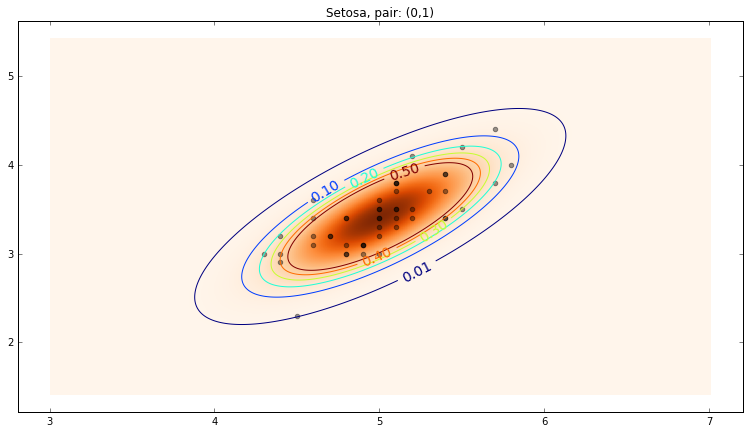

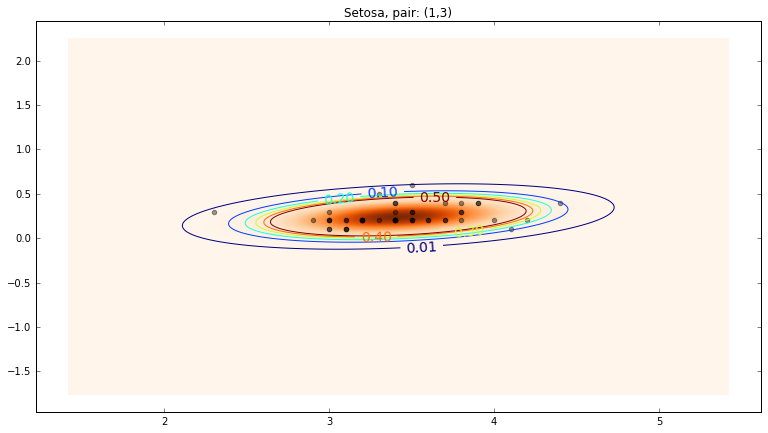

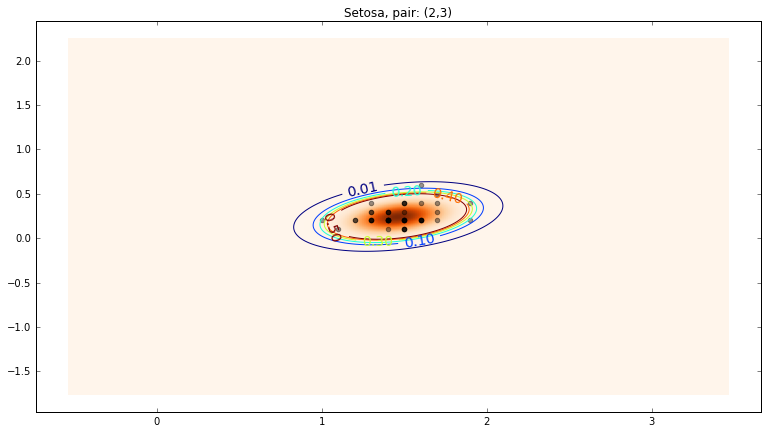

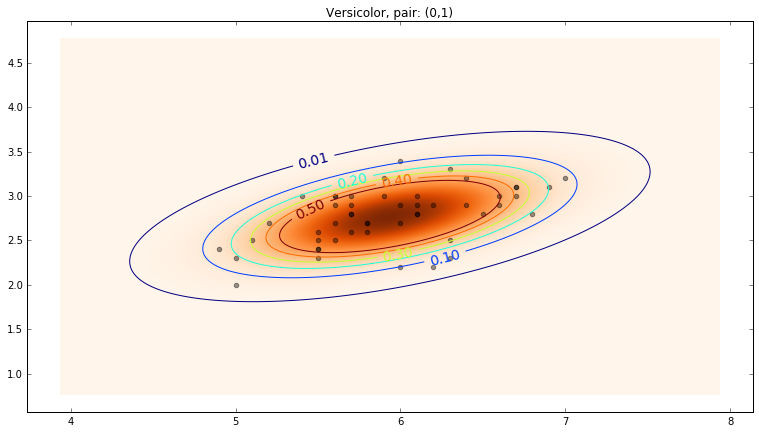

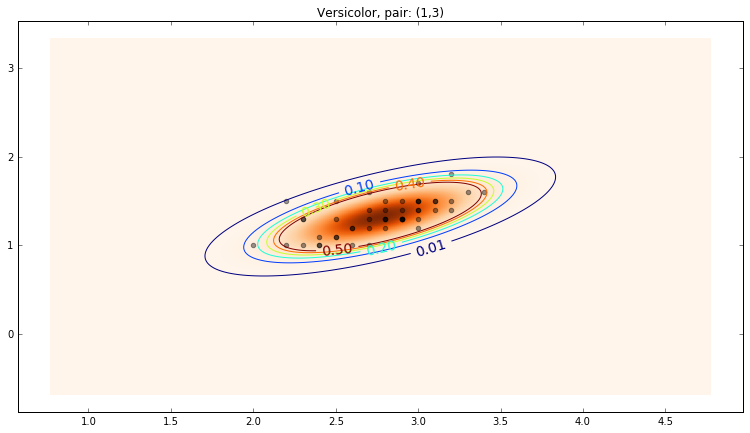

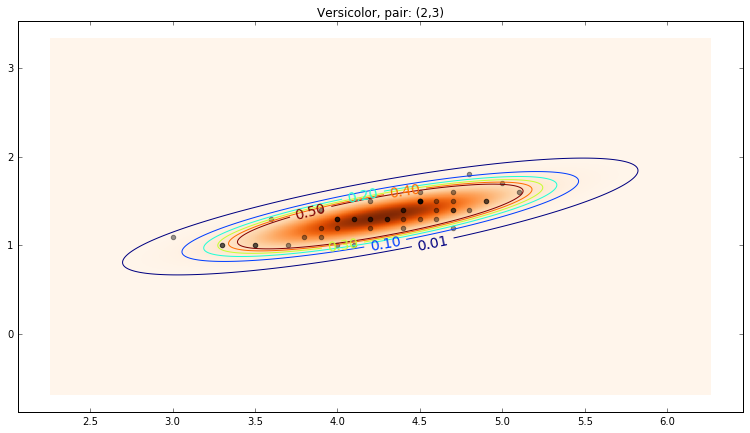

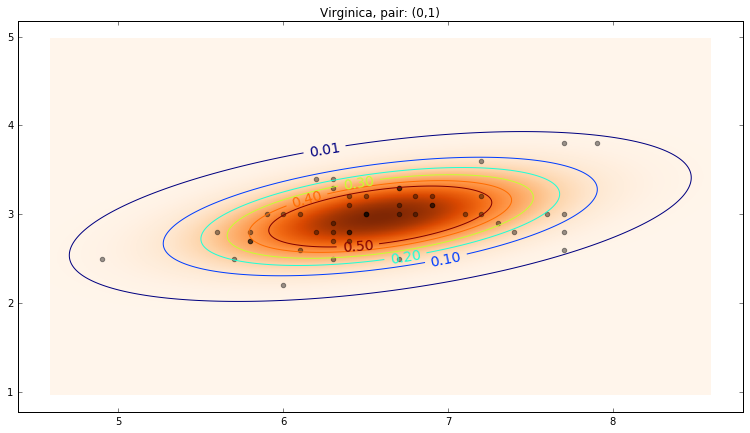

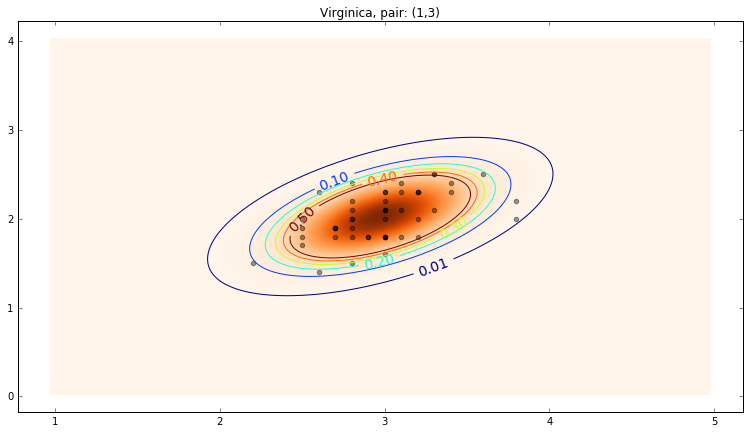

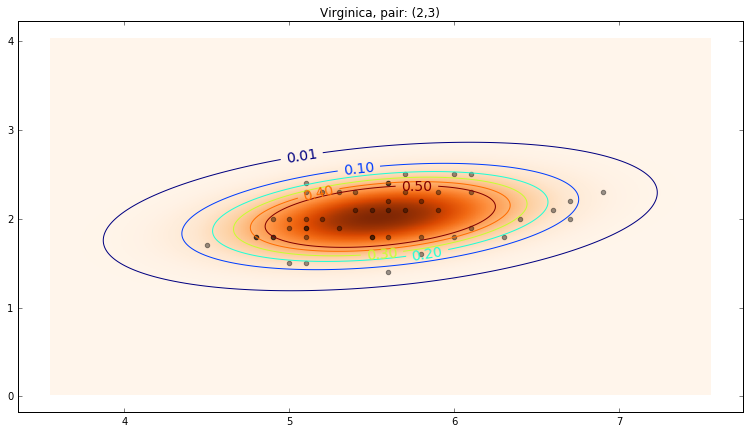

In [6]:
# Plot PDF with estimted parameters.
for cl in [0, 1, 2]: # for each class
    for pair in [[0, 1], [1, 3], [2, 3]]: # in different projections
        # Create grid and multivariate normal
        x = np.linspace(a_classes[cl, pair[0]] - 2, a_classes[cl, pair[0]] + 2, 1000)
        y = np.linspace(a_classes[cl, pair[1]] - 2, a_classes[cl, pair[1]] + 2, 1000)
        X, Y = np.meshgrid(x, y)
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X; pos[:, :, 1] = Y
        rv = multivariate_normal(a_classes[cl, pair], sigma_classes[cl][np.ix_(pair, pair)])
        
        # Plotting
        plt.figure(figsize=(13, 7))
        plt.pcolormesh(X, Y, rv.pdf(pos),  cmap='Oranges')
        plt.scatter(data_classes[cl, :, pair[0]], data_classes[cl, :, pair[1]], alpha=0.4, color="black")
        CS = plt.contour(X, Y, rv.pdf(pos), [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
        plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
        plt.title(('Setosa' if cl == 0 else ('Versicolor' if cl == 1 else 'Virginica')) +
                  r', pair: ('+ str(pair[0]) + ',' + str(pair[1]) + ')')
        plt.show()

In [7]:
# Aggregate all data except k for k = 1,2,3 and estimate new means (E(X|T != k) = E(X|I{T != k} = 1)).
data_12 = np.append(data_classes[1], data_classes[2], axis=0)
data_02 = np.append(data_classes[0], data_classes[2], axis=0)
data_01 = np.append(data_classes[0], data_classes[1], axis=0)
cond_data = np.array([data_12, data_02, data_01])
cond_exp = np.array([[np.mean(cond_data[k,:,dim]) for dim in range(4)] for k in range(3)])
print(cond_exp)

[[ 6.262  2.872  4.906  1.676]
 [ 5.797  3.196  3.508  1.135]
 [ 5.471  3.094  2.862  0.785]]


### $p_{(X|I\{T\neq k\})}(x|1) = \frac{\sum_{i\neq k}{p_i(x)P(T=i)}}{P(T\neq k)} = \frac{1}{2}\sum_{i\neq k}p_i(x)$

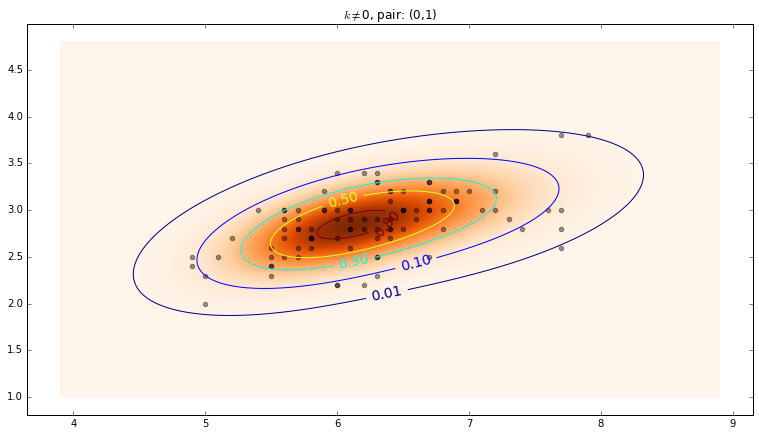

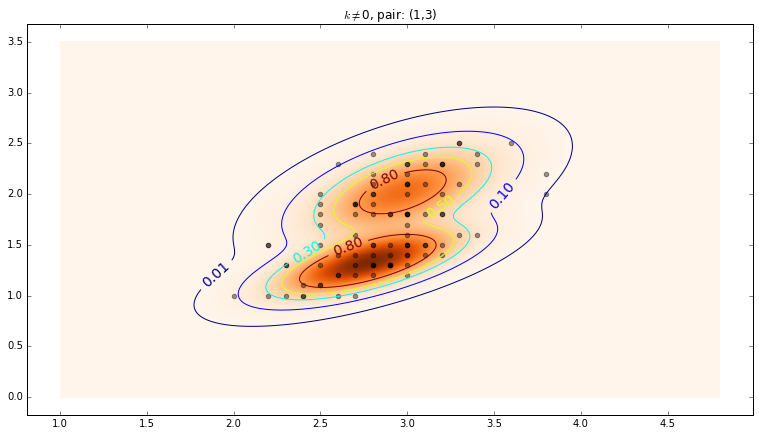

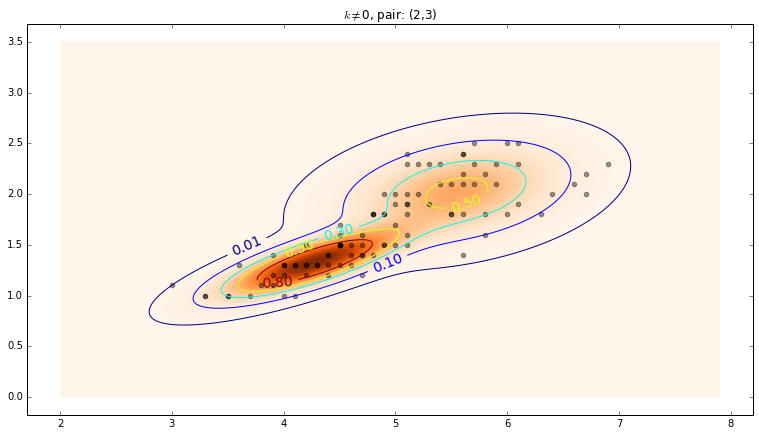

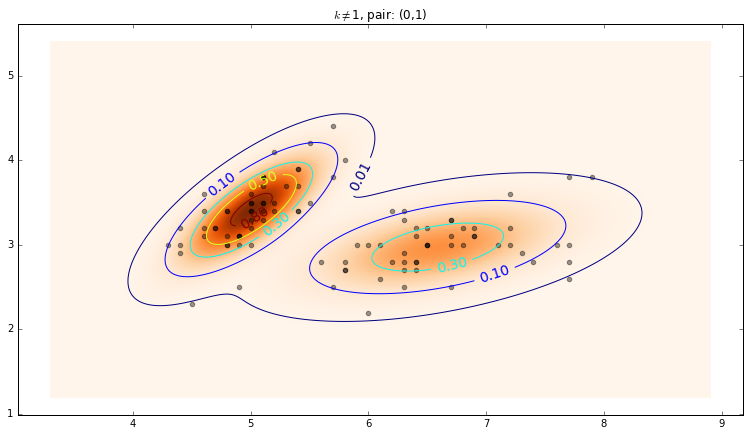

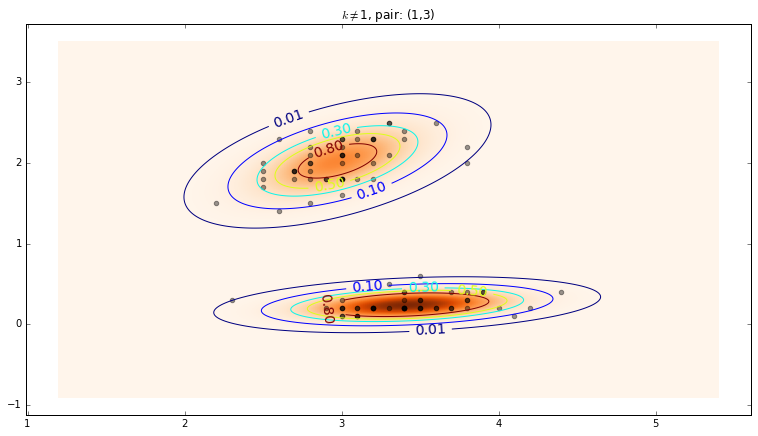

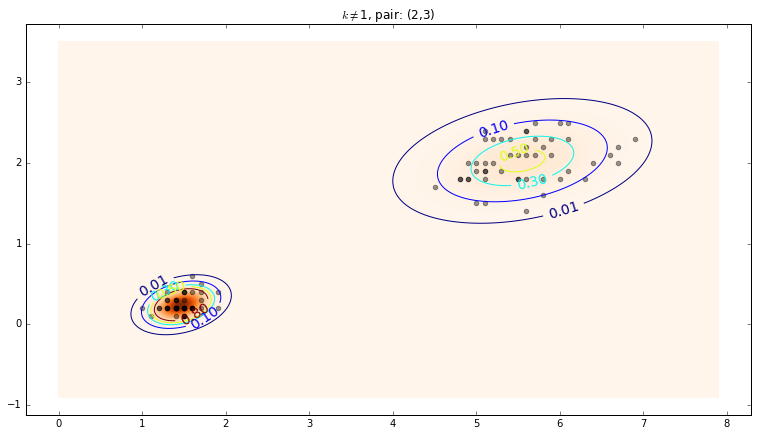

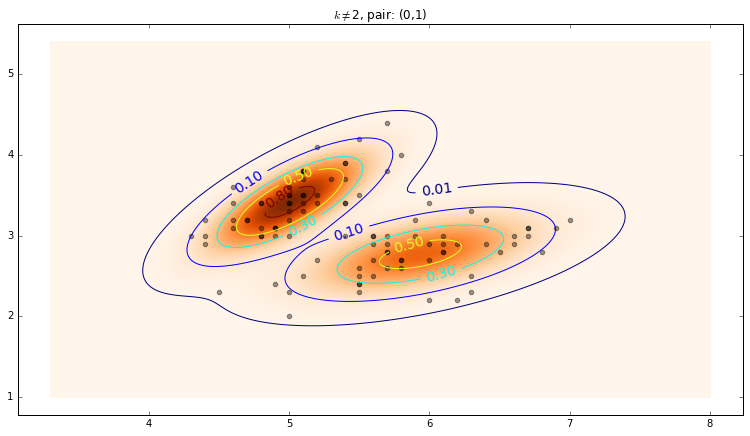

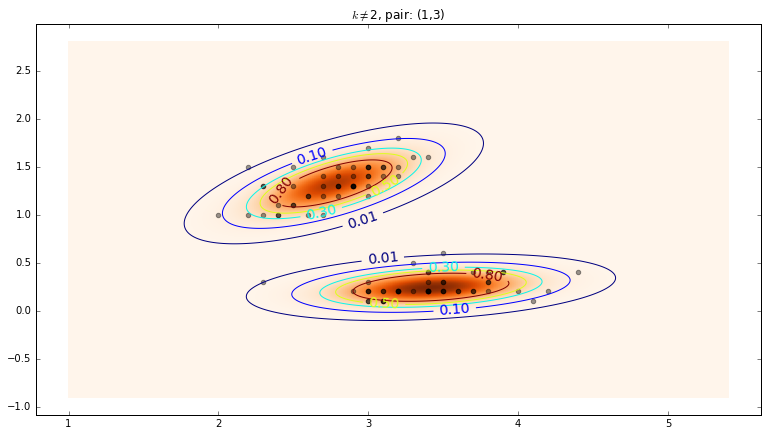

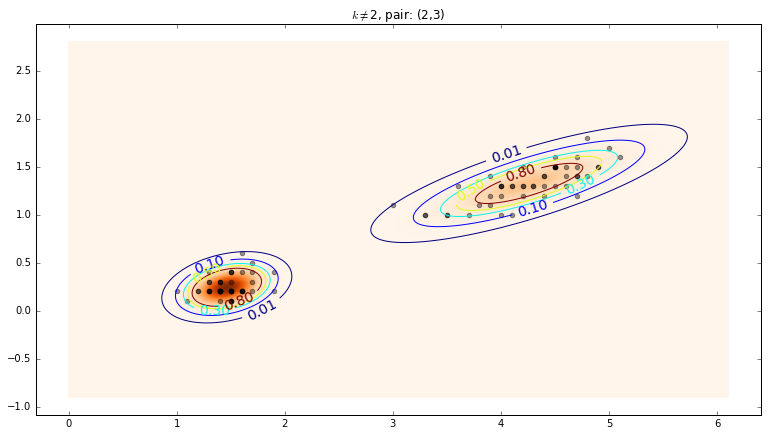

In [8]:
# Plot conditional density.
k = 0
for cl in [[1, 2], [0, 2], [0, 1]]:
    for pair in [[0, 1], [1, 3], [2, 3]]:
        # Create grid and multivariate normal
        x0 = np.min(cond_data[k, pair[0]]) - 1
        x = np.linspace(np.min(cond_data[k, :, pair[0]]) - 1, 
                        np.max(cond_data[k, :, pair[0]]) + 1, 1000)
        y = np.linspace(np.min(cond_data[k, :, pair[1]]) - 1, 
                        np.max(cond_data[k, :, pair[1]]) + 1, 1000)
        X, Y = np.meshgrid(x, y)
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X; pos[:, :, 1] = Y
        rv1 = multivariate_normal(a_classes[cl[0], pair], sigma_classes[cl[0]][np.ix_(pair, pair)])
        rv2 = multivariate_normal(a_classes[cl[1], pair], sigma_classes[cl[1]][np.ix_(pair, pair)])
        
        # Plotting
        plt.figure(figsize=(13, 7))
        plt.pcolormesh(X, Y, (rv1.pdf(pos) + rv2.pdf(pos)) / 2,  cmap='Oranges')
        plt.scatter(cond_data[k, :, pair[0]], cond_data[k, :, pair[1]], alpha=0.4, color="black")
        CS = plt.contour(X, Y, (rv1.pdf(pos) + rv2.pdf(pos)) / 2, [0.01, 0.1, 0.3, 0.5, 0.8])
        plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
        plt.title(r'$k\neq$' + str(k) + r', pair: ('+ str(pair[0]) + ',' + str(pair[1]) + ')')
        plt.show()
        
    k += 1

In [9]:
# Function argmax defines the class of x.
def argmax(x, pdf):
    max = pdf[0](x)
    maxarg = 0
    for k in [1, 2]:
        if max < pdf[k](x):
            max = pdf[k](x)
            maxarg = k
    return maxarg

In [10]:
# Classify our data.
pdf = np.array([multivariate_normal(a_classes[k], sigma_classes[k]).pdf for k in range(3)])
classes = np.array([argmax(x, pdf) for x in load_iris().data])
error = Counter(classes == load_iris().target)[False] / len(classes)
print('CLASSES:\n', classes)
print('ERROR: ', 100 * error, '%')

CLASSES:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
ERROR:  2.0 %


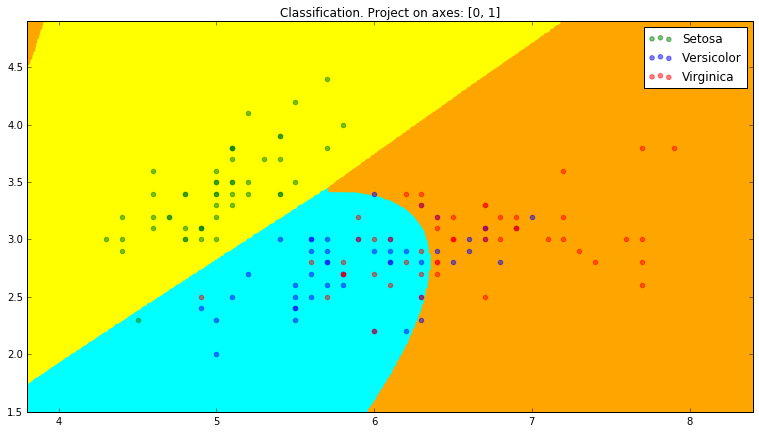

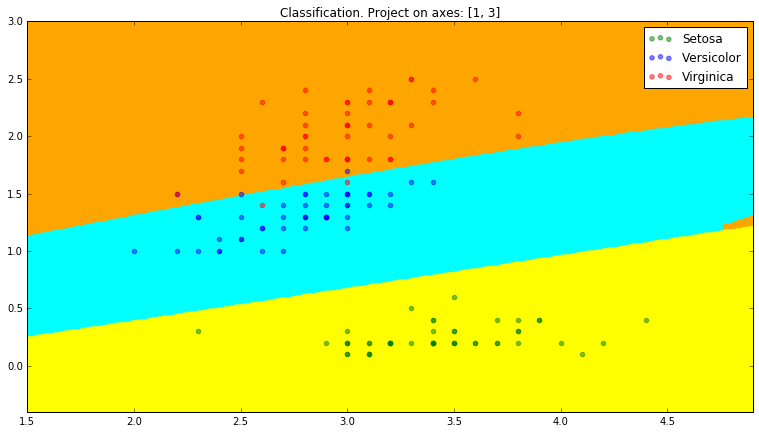

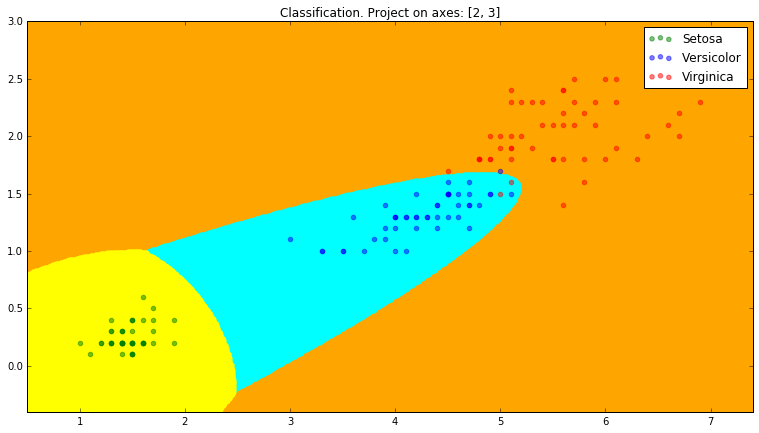

In [38]:
# Plot the classification.
new_classes = [[],[],[]]
for i in range(len(load_iris().data)):
    new_classes[classes[i]].append(load_iris().data[i])
    
for pair in [[0, 1], [1, 3], [2, 3]]:  
    pdf = np.array([multivariate_normal(a_classes[k, pair], 
                                        sigma_classes[k][np.ix_(pair, pair)]).pdf for k in range(3)])
    
    # Grid.
    x0 = np.min(load_iris().data[:,pair[0]])
    x1 = np.max(load_iris().data[:,pair[0]])
    y0 = np.min(load_iris().data[:,pair[1]])
    y1 = np.max(load_iris().data[:,pair[1]])    
    num = 500
    x = np.linspace(x0 - 0.5, x1 + 0.5, num);
    y = np.linspace(y0 - 0.5, y1 + 0.5, num);
    
    # Here I determine class of each point in the grid.
    back = [[],[],[]]
    for i in range(num):
        for j in range(num):
            back[argmax([x[i], y[j]], pdf)].append([x[i], y[j]])
    
    
    plt.figure(figsize=(13, 7))
    # Plot areas of each class (background).
    plt.scatter([back[0][k][0] for k in range(len(back[0]))], 
                [back[0][k][1] for k in range(len(back[0]))], color = "yellow")
    plt.scatter([back[1][k][0] for k in range(len(back[1]))], 
                [back[1][k][1] for k in range(len(back[1]))], color="cyan")
    plt.scatter([back[2][k][0] for k in range(len(back[2]))],
                [back[2][k][1] for k in range(len(back[2]))], color="orange")
    # Plot classified data.
    plt.scatter([new_classes[0][k][pair[0]] for k in range(len(new_classes[0]))],
                [new_classes[0][k][pair[1]] for k in range(len(new_classes[0]))], 
                color="green", alpha=0.5, label=r'Setosa')
    plt.scatter([new_classes[1][k][pair[0]] for k in range(len(new_classes[1]))],
                [new_classes[1][k][pair[1]] for k in range(len(new_classes[1]))], 
                color="blue", alpha=0.5, label=r'Versicolor')
    plt.scatter([new_classes[2][k][pair[0]] for k in range(len(new_classes[2]))],
                [new_classes[2][k][pair[1]] for k in range(len(new_classes[2]))], 
                color="red", alpha=0.5, label=r'Virginica')
    
    plt.xlim(x0 - 0.5, x1 + 0.5)
    plt.ylim(y0 - 0.5, y1 + 0.5)
    plt.legend()
    plt.title(r'Classification. Project on axes: ' + str(pair))
    
    plt.show()

# Вывод

Нам была дана выборка четырехмерных векторов, распределенных по трем классам (известным нам с самого начала). Мы оценили параметры распределений векторов для каждого из трех классов, построили графики плотностей и условных плотностей этих векторов в проекциях на оси. Далее по полученным оценкам параметров мы уже сами разбили всю совокупность векторов на три класса. Точность на обучающей выборке составила 98%. Фактически, для нового вектора (из неизвестного заранее класса) мы теперь можем определить класс с некоторой точностью, а значит мы решили задачу классификации! 